**The Boston Housing Dataset**

# Background
- 이 데이터셋은 1970년대 보스턴 주변 지역의 주택 가격과 관련된 정보를 기록하고 있음.
- 1970년도 보스턴 주변 지역 상황은 지역경제 발전이 미비하고, 주거 상황이 불량하며, 인구밀도 높은 편이라고 함. 

**컬럼설명 및 가설**

- CRIM: per capita crime rate by town
    - 범죄율이 높은 지역은 부동산 가치가 낮을 것이다. 
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    - 거대한 거주지역에 비싼 가격의 주택이 있을 가능성이 높다.
- INDUS: proportion of non-retail business acres per town
    - 산업 토지가 더 많은 지역이 부동산 가치가 낮은 경향이 있을 것이다.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - 강 근처에 있는 부동산이 더 선호되고 따라서 더 비싼 경향이 있을 것이다.
- NOX: nitric oxides concentration (parts per 10 million)
    - 질소 산화물 농도가 높을수록 주택가격이 낮은경향을 보일것이다.
    - 공장이나 고속도로 근처라서?
- RM: average number of rooms per dwelling
    - 방이 많을수록 더 비싼 경향이 있을 것이다.
- AGE: proportion of owner-occupied units built prior to 1940
    - 타운에 1940년 이전에 지어진 집의 비율이 높을수록 집가격이 낮을 것이다.
- DIS: weighted distances to five Boston employment centers
    - 고용센터까지의 거리 잘모르겠다.
- RAD: index of accessibility to radial highways
    - 고속도로 접근성 높을수록 집값이 비쌀것이다.
    
- TAX: full value property tax rate per USD 10,000
    - 집값이 비쌀수록 내는 세금도 높을 것이다. (이거는 순서가 반대 아닌가?)
- PTRATIO: pupil-teacher ratio by town
    * 학생 vs 교사 비율이 낮을수록
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - 마을네 흑인 비율이 높은경우 부동산 가치가 낮을 것이다. 
- LSTAT: % lower status of the population
    - 집값이 낮은 동네일수록 저소득 거주자의 비율이 높을 것이다. 
- PRICE: Median value of owner-occupied homes in $1000s. This is the target variable.


# Data Validation
Check all variables in the data

## Import libraries

In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats  
from sklearn.datasets import load_boston

## Load dataset

In [96]:
# boston 데이터셋 로드
boston = load_boston()

# DataFrame 변환
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# target value 추가
df['PRICE'] = boston.target
print('Boston 데이터셋 크기 :', df.shape)
df.head()

Boston 데이터셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Check the information
- 전부 수치형데이터
- 결측치, 중복값 없음

In [97]:
# 자료형, 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [98]:
# 중복값 확인
df.duplicated().sum()

0

- 컬럼마다 단위가 다르고, 당연히 숫자의 크기도 다르다
- k-nn이나 경사하강법처럼 scale에 민감한 모델에 악영향줄 수 있다.
- feature normalization 
    - feature간 유사한 범위의 값을 가지게 해주는 전처리방법
    - 종류 
        - standard scaling (평균 0 표준편차 1로 만드는 방법)
        - min-max scaling (최저 0 최대 1 값으로 만드는 방법)

In [99]:
# 컬럼별 통계분포 확인
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# EDA

## boxplot

- 왜도가 심한 데이터들이 많다.
- 왜도가 심하면 편향되거나 신뢰할 수 없는 모델 성능이 발생할 수 있음
    - 편향 : 영점조절 안된 총
- log, sqrt 등의 값으로 왜도를 줄여준다.
- 선형모델로 회귀를 할게 아니면 반드시 해야할 필요가 없음 
    - 위와같은 전처리를 해주면 선형모델의 성능은 상승하지만, 비선형모델에 비해 성능이 낮음 (해당 데이터셋 기준)
    - 심지어 log, sqrt 처리시 비선형 모델의 성능이 저하 (해당 데이터셋 기준)
    - **데이터셋의 종류와, 모델에 따라 다르다고 하니 항상 확인은 필수**

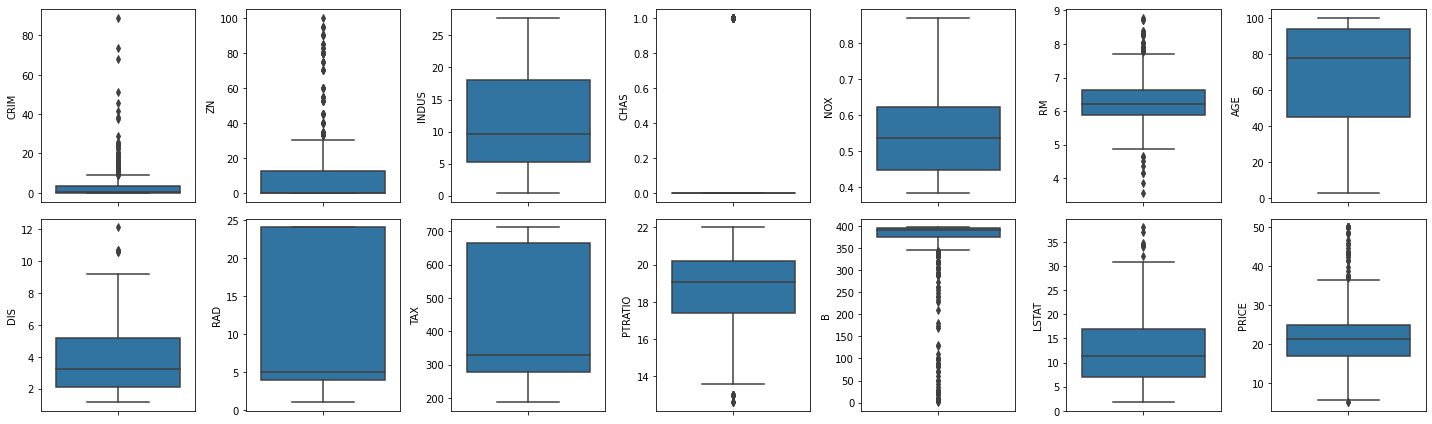

In [100]:
# 시각화
fig, ax = plt.subplots(2,7, figsize=(20, 6))
ax = ax.flatten() # axses 평탄화, 2차원 좌표 입력없이 자동 줄바꿈 가능

i = 0
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=ax[i])
    i += 1

    plt.tight_layout()
plt.show()

## histplot

- PRICE : 설명변수, 정규분포
- CHAS : 2진분류 클래스 불균형 -> 언더샘플링이나, 데이터증강이 필요한데 꼭 해야하는지 모르겠다. 데이터 수가 적기도 하고
    - 언더샘플링 :
        - 장/단점
    - 데이터증강 : 
        - 장/단점
- CRIM, ZN : 0 값이 비정상적으로 많다.
    - 0값이 대부분 컬럼은 어떻게 처리 해야하는지 알아보기

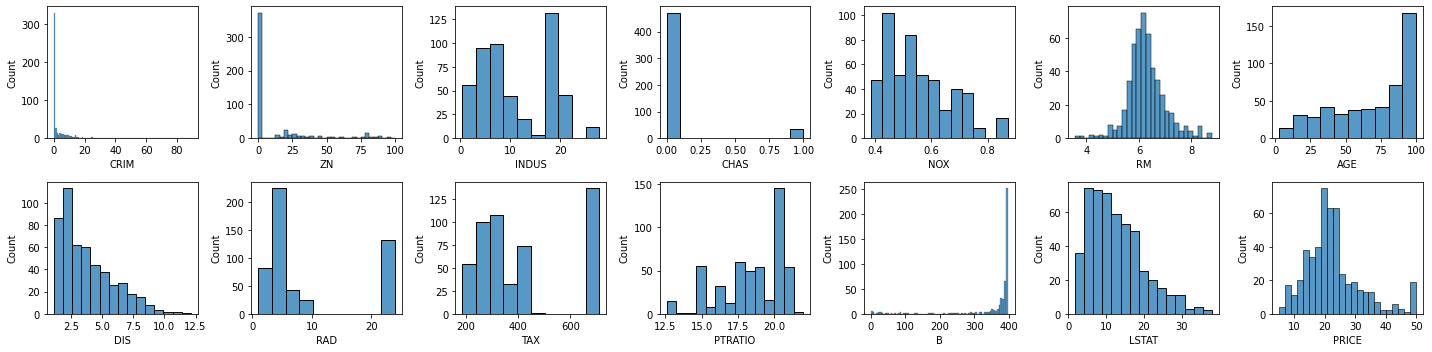

In [69]:
# hist plot
fig, ax = plt.subplots(2,7, figsize=(20, 5))
i = 0

# flatten 써줘서 입체적으로 ax 좌표 입력 안해줘도 된다.
ax = ax.flatten()

for k,v in df.items():
    sns.histplot(x=k, data=df, ax=ax[i])
    i += 1

    plt.tight_layout()
plt.show()

## scatter plot (vs PRICE)

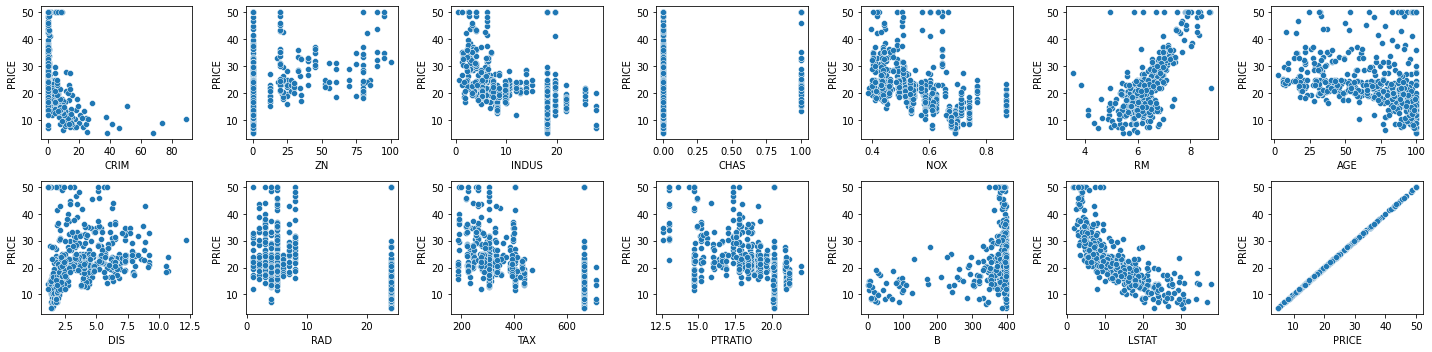

In [70]:
# scatter plot
fig, ax = plt.subplots(2,7, figsize=(20, 5))
i = 0

# flatten 써줘서 입체적으로 ax 좌표 입력 안해줘도 된다.
ax = ax.flatten()

for k,v in df.items():
    y='PRICE'
    sns.scatterplot(y=y, x=k, data=df, ax=ax[i])
    i += 1

    plt.tight_layout()
plt.show()

## pair plot 및 heat map

다중공선성이 걱정되어서 검색해본결과 이 또한 비선형모델을 사용하는 경우 알아서 잘 해결해준다는 의견이 많았음
- 다중공선성 : 

피처간 상관관계가 높은 경우가 상당 수 존재
- TAX vs RAD : 0.91
- DIS vs INDUS : -0.71
- DIS vs NOX : -0.77
- DIS vs AGE : -0.75

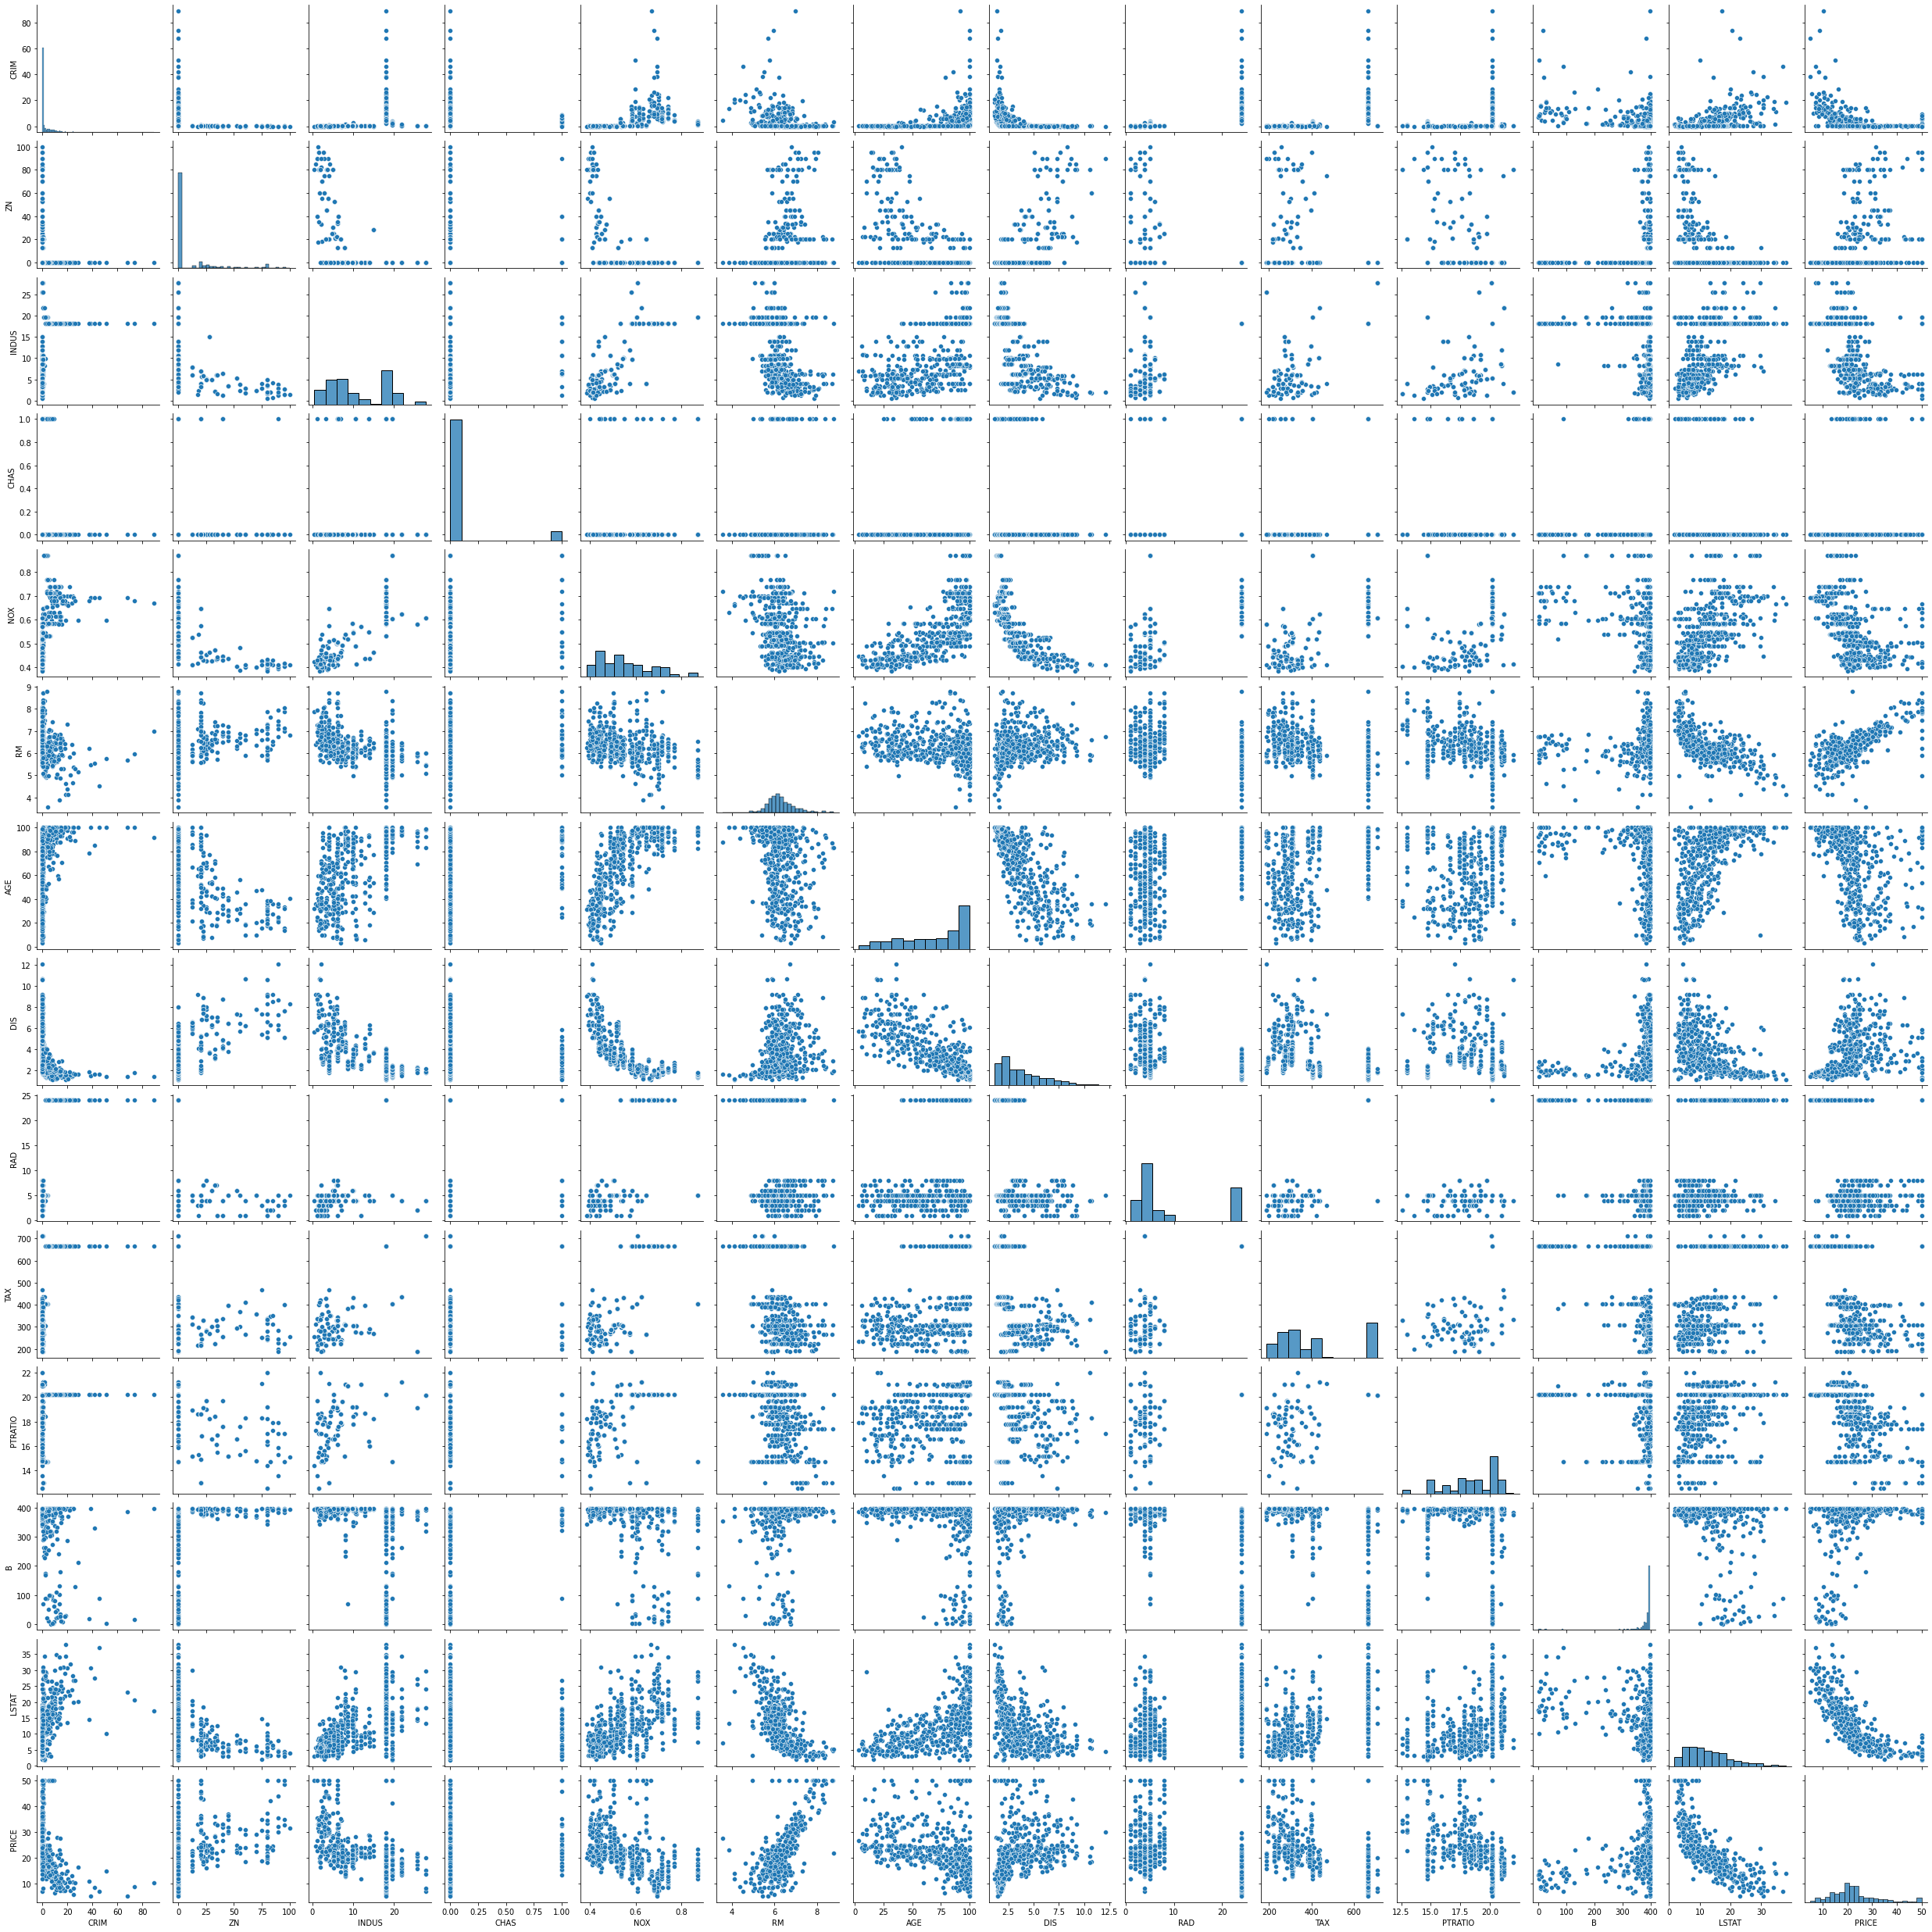

In [72]:
sns.pairplot(df);

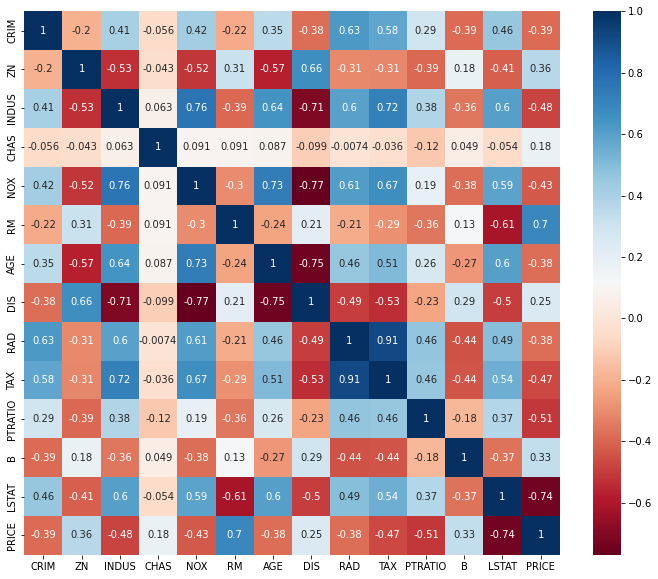

In [73]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=df.corr(), cmap='RdBu')
plt.show()

또한, VIF가 높은 컬럼을 제거 후 학습한 결과 오히려 성능 저하발생
- VIF(variance_inflation_factor) : 

In [74]:
# VIF 측정
from statsmodels.stats.outliers_influence import variance_inflation_factor

target = 'PRICE'

# Extract the feature columns
features = df.drop([target], axis=1)

# Create an empty list to store the VIF values
vif_values = []

# Loop through each feature column and calculate its VIF value
for i in range(features.shape[1]):
    vif = variance_inflation_factor(features.values, i)
    vif_values.append(vif)

# Print the VIF values for each feature column
for i in range(len(vif_values)):
    print(f"VIF for feature {features.columns[i]}: {vif_values[i]}")

VIF for feature CRIM: 2.1003728199615233
VIF for feature ZN: 2.8440132669462646
VIF for feature INDUS: 14.485757706539308
VIF for feature CHAS: 1.1529518589418777
VIF for feature NOX: 73.89494652814788
VIF for feature RM: 77.94828304638538
VIF for feature AGE: 21.38685048994314
VIF for feature DIS: 14.6996523837492
VIF for feature RAD: 15.167724857920897
VIF for feature TAX: 61.227274009649456
VIF for feature PTRATIO: 85.02954731061801
VIF for feature B: 20.104942636229136
VIF for feature LSTAT: 11.102024772203539


## 컬럼별 가설 검증과정 추가

# Modeling

## train, test 분리 

In [120]:
from sklearn.model_selection import train_test_split

target = 'PRICE'
y = df[target]
X = df.drop([target], axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## model 설정

- 선형회귀 : MSE를 최소화하는 파라미터 w(가중치)와 b(편향)을 찾는다. 1차원
- 다항회귀 : 

In [121]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# 선형모델 
lr = LinearRegression() # 선형회귀
lasso = LassoCV(cv=5, random_state=42)  
ridge = RidgeCV(cv=5) 
elastic = ElasticNetCV(cv=5)

# 비선형 모델
pr = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()) # 다항회귀
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor(base_estimator=dt, n_estimators=100, random_state=42)
xgb = XGBRegressor(random_state=42)
stack = StackingRegressor(estimators=[('rf',rf), ('gb',gb), ('ada',ada), ('xgb',xgb)])

## 학습 및 예측 함수 생성

In [122]:
models = [lr,pr,lasso,ridge,elastic,rf,gb,dt,ada,xgb,stack]
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

def learning(X, y):
    for model in models:
        model.fit(X,y)

In [123]:
def prediction(X, y):
    for model in models:
        # predictioon
        y_pred = model.predict(X)
        
        # 점수생성
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)        
        
        # dictionary에 append 
        dic['mae'].append(mae)
        dic['mse'].append(mse)
        dic['r2'].append(r2)
        dic['rmse'].append(rmse)
        dic['mape'].append(mape)

**평가지표**
- R2_socre, RMSE(Root Mean Square Error) 2가지 위주 확인

R2 score 관련
- If a non-linear model has a higher R2 score than a linear model, it suggests that the non-linear model is better at fitting the data and explaining the variation in the dependent variable. 
- This means that a linear model is not able to capture the underlying patterns and relationships in the data as well as a non-linear model does. 
- It could indicate that the data has a non-linear relationship between the independent and dependent variables. 
- However, it's important to keep in mind that having a high R2 score doesn't always mean that the model is good, overfitting or multicollinearity also can affect the R2 score. 
- It is also important to consider other evaluation metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE) to get a more robust evaluation of the model.

MSE, MAE, RMSE
- MSE(Mean Squared Error), MAE(Mean Absolute Error) 및 RMSE(Root Mean Squared Error)는 모두 회귀 모델에 일반적으로 사용되는 평가 메트릭입니다.

- MSE는 예측 값과 실제 값 사이의 평균 제곱 차이를 측정합니다. 더 큰 오류에 더 높은 가중치를 부여하고 이상치에 민감합니다.

- MAE는 예측 값과 실제 값 간의 평균 절대 차이를 측정합니다. 더 큰 오류에 더 높은 가중치를 부여하지 않으며 이상값에 민감하지 않습니다.

- RMSE는 MSE의 제곱근이며 종속 변수와 동일한 단위입니다.

- 어느 것이 가장 좋은지는 특정 사용 사례와 문제의 맥락에 따라 다릅니다. MSE는 일반적으로 큰 오류의 비용이 높은 경우에 사용되며 이상값에 민감하므로 이상값이 중요한 문제에 유용할 수 있으며 최적화를 위한 훌륭한 수학적 속성도 있습니다. MAE는 해석하기 쉽고 이상값에 대해 보다 강력한 결과를 제공하므로 이상값이 중요하지 않고 모델 성능의 보다 강력한 추정치에 초점이 있는 경우에 유용할 수 있습니다.

- RMSE는 데이터가 정규 분포일 때 사용되며 모델의 예측이 실제 값에서 얼마나 벗어나는지 파악하는 것이 중요합니다.

- 일반적으로 여러 평가 지표를 평가하고 문제의 맥락을 고려하여 어느 것이 더 적절한지 결정하는 것이 좋습니다.

## 학습 및 예측

### CASE 1 - nomalization 없이 학습

- best model : stacking regressor
- best score
    - r2 : 0.905685	
    - rmse : 2.650987

In [140]:
learning(X_train, y_train) # 학습
prediction(X_test, y_test) # 예측

In [129]:
# 평가결과 시각화 함수
r2_scores = []

def viz(dic):
    df_score = pd.DataFrame(dic)
    display(df_score.style.background_gradient(axis=0, subset=['rmse'], cmap='Greens_r').background_gradient(axis=0, subset=['r2'], cmap='Greens'))
    r2_scores.append(df_score['r2'])
    print()
    
    # 시각화
    fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)

    sns.barplot(y=df_score['model_name'], x=df_score['r2'], ax=ax[0])
    ax[0].set_title('r2_score')

    sns.scatterplot(y=df_score['model_name'], x=df_score['rmse'], ax=ax[1], marker='s', s=100, color='k')
    ax[1].set_title('rmse')
    plt.tight_layout()
    sns.despine()
    plt.show()

- polynomial 모델에 대한 성능이 굉장히 떨어진다. 왜?
- 선형모델보다 비선형모델의 성능이 좋다.

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.162710,21.517444,0.711226,4.638690,0.165212
1,Polynomial,5.509050,68.231265,0.084305,8.260222,0.306928
2,Lasso,3.494534,24.227317,0.674858,4.922125,0.178426
3,Ridge,3.162397,21.585116,0.710318,4.645978,0.165205
4,ElasticCV,3.741566,26.471647,0.644738,5.145060,0.187859
5,RandomForest,2.083605,9.619662,0.870900,3.101558,0.108568
6,GradientBoost,2.054253,8.137358,0.890793,2.852605,0.104648
7,DecisionTree,2.480921,11.039145,0.851850,3.322521,0.132413
8,AdaBoost,1.935526,7.331711,0.901605,2.707713,0.101210
9,XGB,2.091346,9.238913,0.876010,3.039558,0.110018


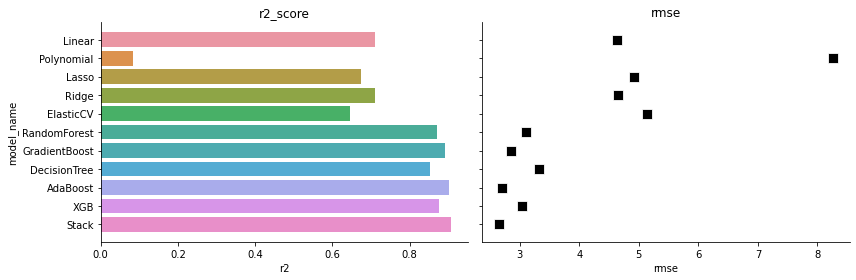

In [130]:
viz(dic)

### CASE 2 - StandardScaler 적용

In [131]:
# standard scaler 실시
from sklearn.preprocessing import StandardScaler
models = [lr,pr,lasso,ridge,elastic,rf,gb,dt,ada,xgb,stack]
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
learning(X_train_scaled, y_train)
prediction(X_test_scaled, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.162710,21.517444,0.711226,4.638690,0.165212
1,Polynomial,3.032532,23.951690,0.678557,4.894046,0.168614
2,Lasso,3.159087,21.550057,0.710788,4.642204,0.164979
3,Ridge,3.151775,21.811243,0.707283,4.670251,0.163906
4,ElasticCV,3.151218,21.843456,0.706851,4.673698,0.163947
5,RandomForest,2.084408,9.621857,0.870870,3.101912,0.108546
6,GradientBoost,2.051780,8.131552,0.890871,2.851588,0.104541
7,DecisionTree,2.486842,11.045395,0.851766,3.323461,0.132844
8,AdaBoost,2.150000,12.261184,0.835449,3.501597,0.108217
9,XGB,2.104508,9.576474,0.871479,3.094588,0.110282


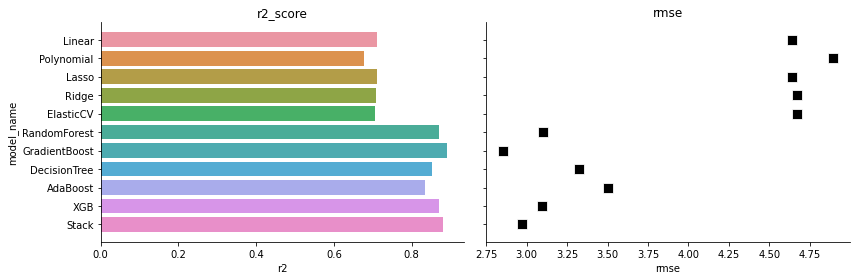

In [133]:
viz(dic)

### CASE 3 - MinMax Scaler 적용

In [134]:
from sklearn.preprocessing import MinMaxScaler
models = [lr,pr,lasso,ridge,elastic,rf,gb,dt,ada,xgb,stack]
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
learning(X_train_scaled, y_train)
prediction(X_test_scaled, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.162710,21.517444,0.711226,4.638690,0.165212
1,Polynomial,3.064950,25.257540,0.661032,5.025688,0.171123
2,Lasso,3.157204,21.511941,0.711300,4.638097,0.164766
3,Ridge,3.108732,21.532721,0.711021,4.640336,0.157753
4,ElasticCV,3.120967,21.436686,0.712310,4.629977,0.160417
5,RandomForest,2.081237,9.626172,0.870812,3.102607,0.108462
6,GradientBoost,2.053712,8.135390,0.890819,2.852261,0.104627
7,DecisionTree,2.676974,16.255461,0.781844,4.031806,0.146967
8,AdaBoost,2.069737,11.122105,0.850736,3.334982,0.102216
9,XGB,2.109524,9.594457,0.871238,3.097492,0.110621


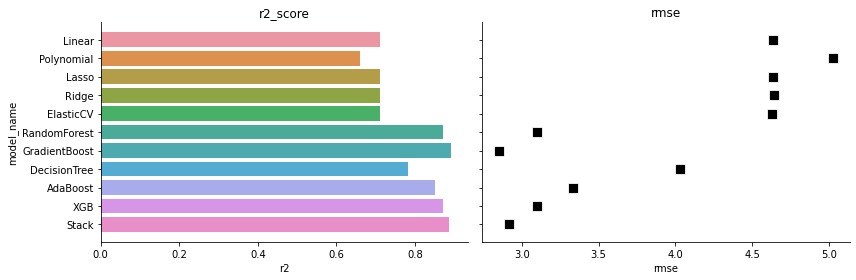

In [136]:
viz(dic)

normalization(정규화, scaler) 여/부에 따른 r2 score 확인
- 정규화 실시하면 선형모델의 성능은 상승하지만
- 비선형모델의 성능이 떨어짐 
- 특히 min_max scaler 사용시 decision tree의 성능이 급격히 하락 했다.
- 정규화가 불필요한 컬럼에도 일괄적으로 정규화를 해서 성능이 떨어진걸까?

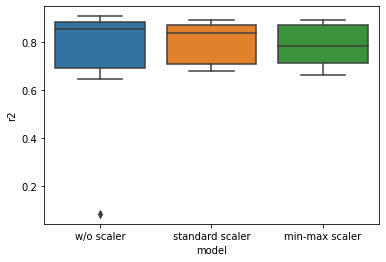

In [138]:
# Create a list of dataframes
data1 = [pd.DataFrame({'r2': r2_scores[0], 'model': 'w/o scaler'}), 
        pd.DataFrame({'r2': r2_scores[1], 'model': 'standard scaler'}), 
        pd.DataFrame({'r2': r2_scores[2], 'model': 'min-max scaler'})]

# Concatenate the dataframes into one
df_r2 = pd.concat(data1)

# Create the boxplot
sns.boxplot(x='model', y='r2', data=df_r2)
plt.show()

### CASE 4 - Select KBest + wo normalization

In [159]:
from sklearn.feature_selection import SelectKBest, f_regression

target = 'PRICE'
tmp = df.copy()
y = tmp[target]
X = tmp.drop(target, axis=1)

# Select top k features based on correlation with target variable
selector = SelectKBest(f_regression, k=12)
X_new = selector.fit_transform(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [160]:
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

learning(X_train, y_train)
prediction(X_test, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.237242,24.635394,0.664065,4.963405,0.173398
1,Polynomial,2.594509,13.200547,0.819994,3.633256,0.134906
2,Lasso,3.172996,24.152987,0.670643,4.914569,0.165533
3,Ridge,3.229745,24.666843,0.663636,4.966573,0.173018
4,ElasticCV,3.307758,24.557942,0.665121,4.955597,0.168791
5,RandomForest,2.048078,8.359350,0.886010,2.891254,0.112196
6,GradientBoost,1.941649,6.280827,0.914353,2.506158,0.100887
7,DecisionTree,2.782353,23.210784,0.683491,4.817757,0.152037
8,AdaBoost,1.894118,5.792157,0.921017,2.406690,0.103862
9,XGB,1.925288,6.601789,0.909976,2.569395,0.095281


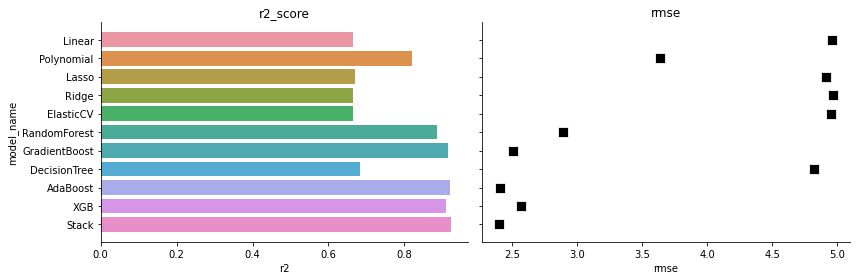

In [161]:
r2_scores = []
viz(dic)

### CASE 5 - Select KBest + Standard Scaler

In [163]:
# standard scaler 실시
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
learning(X_train_scaled, y_train)
prediction(X_test_scaled, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.237242,24.635394,0.664065,4.963405,0.173398
1,Polynomial,2.604973,13.346385,0.818005,3.653270,0.138754
2,Lasso,3.231088,24.658993,0.663743,4.965782,0.173168
3,Ridge,3.233927,24.657356,0.663765,4.965617,0.173314
4,ElasticCV,3.222792,24.727088,0.662815,4.972634,0.172937
5,RandomForest,2.050647,8.372268,0.885833,2.893487,0.112291
6,GradientBoost,1.940843,6.279789,0.914367,2.505951,0.100853
7,DecisionTree,2.296078,9.643137,0.868503,3.105340,0.122362
8,AdaBoost,1.855882,5.938725,0.919018,2.436950,0.097443
9,XGB,1.925173,6.618397,0.909750,2.572625,0.095231


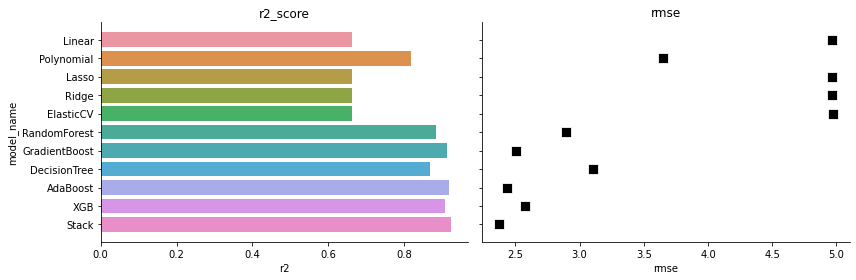

In [165]:
viz(dic)

### CASE 6 - Select KBest + MinMax Scaler

In [167]:
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [168]:
learning(X_train_scaled, y_train)
prediction(X_test_scaled, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.237242,24.635394,0.664065,4.963405,0.173398
1,Polynomial,2.706449,13.828151,0.811435,3.718622,0.142679
2,Lasso,3.229945,24.622656,0.664239,4.962122,0.173020
3,Ridge,3.220274,24.526582,0.665549,4.952432,0.172384
4,ElasticCV,3.175523,24.173573,0.670362,4.916663,0.169384
5,RandomForest,2.050127,8.370739,0.885854,2.893223,0.112274
6,GradientBoost,1.940843,6.279789,0.914367,2.505951,0.100853
7,DecisionTree,2.346078,9.598529,0.869112,3.098149,0.125016
8,AdaBoost,1.871569,5.606961,0.923542,2.367902,0.101462
9,XGB,1.927749,6.625377,0.909655,2.573981,0.095401


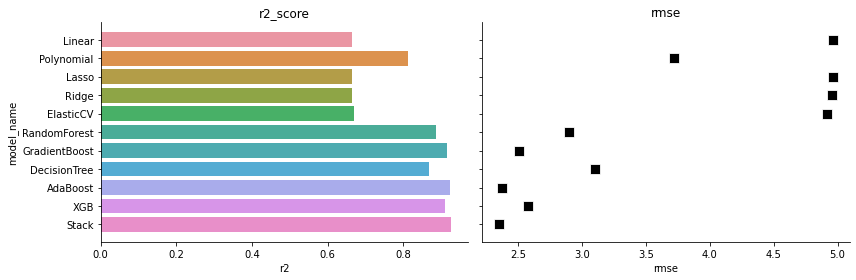

In [169]:
viz(dic)

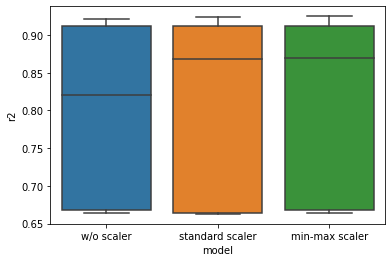

In [170]:
# Create a list of dataframes
data2 = [pd.DataFrame({'r2': r2_scores[0], 'model': 'w/o scaler'}), 
        pd.DataFrame({'r2': r2_scores[1], 'model': 'standard scaler'}), 
        pd.DataFrame({'r2': r2_scores[2], 'model': 'min-max scaler'})]

# Concatenate the dataframes into one
df_r2 = pd.concat(data2)

# Create the boxplot
sns.boxplot(x='model', y='r2', data=df_r2)
plt.show()

### CASE 7 - RFECV + wo normalization

In [172]:
from sklearn.feature_selection import RFECV
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

# Create the RFECV
rfe = RFECV(LinearRegression(), step=1, cv=5)
X_new = rfe.fit_transform(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [173]:
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

learning(X_train, y_train)
prediction(X_test, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.245095,24.972511,0.659468,4.997250,0.168507
1,Polynomial,2.394518,14.574538,0.801258,3.817661,0.127776
2,Lasso,3.200193,25.039507,0.658554,5.003949,0.169117
3,Ridge,3.234053,24.934941,0.659980,4.993490,0.168188
4,ElasticCV,3.255786,25.575617,0.651244,5.057234,0.172669
5,RandomForest,2.035794,8.772589,0.880375,2.961856,0.110940
6,GradientBoost,1.973499,6.594439,0.910076,2.567964,0.105141
7,DecisionTree,2.839216,19.870000,0.729047,4.457578,0.153657
8,AdaBoost,1.852941,6.576471,0.910321,2.564463,0.101172
9,XGB,2.096806,8.211823,0.888021,2.865628,0.108592


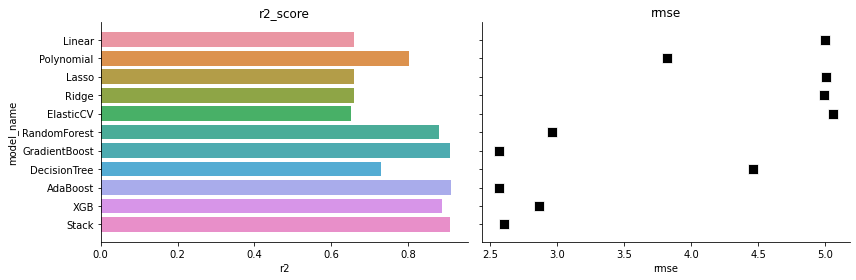

In [174]:
r2_scores = []
viz(dic)

### CASE 8 - RFECV + Standard Scaler

In [175]:
# standard scaler 실시
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
learning(X_train_scaled, y_train)
prediction(X_test_scaled, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.245095,24.972511,0.659468,4.997250,0.168507
1,Polynomial,2.394922,14.577044,0.801223,3.817989,0.127757
2,Lasso,3.241127,24.948789,0.659791,4.994876,0.168351
3,Ridge,3.214073,24.802869,0.661781,4.980248,0.167019
4,ElasticCV,3.231948,24.896083,0.660510,4.989597,0.167917
5,RandomForest,2.040608,8.791370,0.880118,2.965024,0.111186
6,GradientBoost,1.985738,6.743815,0.908039,2.596886,0.105386
7,DecisionTree,2.971569,25.208529,0.656249,5.020810,0.159411
8,AdaBoost,1.764706,5.938039,0.919027,2.436809,0.098226
9,XGB,2.096806,8.211823,0.888021,2.865628,0.108592


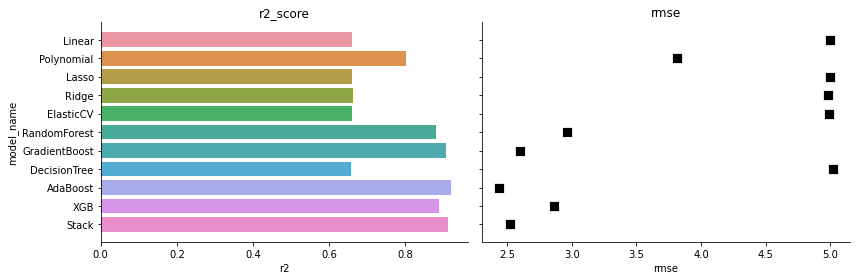

In [177]:
viz(dic)

### CASE 9 - RFECV + MinMax Scaler

In [178]:
dic = {'model_name' : ['Linear','Polynomial','Lasso','Ridge','ElasticCV','RandomForest','GradientBoost','DecisionTree','AdaBoost','XGB', 'Stack'],
       'mae':[], 'mse':[], 'r2':[], 'rmse':[], 'mape':[]}

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
learning(X_train_scaled, y_train)
prediction(X_test_scaled, y_test)

,model_name,mae,mse,r2,rmse,mape
0,Linear,3.245095,24.972511,0.659468,4.997250,0.168507
1,Polynomial,2.394518,14.574538,0.801258,3.817661,0.127776
2,Lasso,3.241230,24.943867,0.659858,4.994384,0.168324
3,Ridge,3.235897,24.881190,0.660713,4.988105,0.167909
4,ElasticCV,3.203358,24.538044,0.665392,4.953589,0.165667
5,RandomForest,2.040196,8.788226,0.880161,2.964494,0.111171
6,GradientBoost,1.973499,6.594439,0.910076,2.567964,0.105141
7,DecisionTree,2.571569,12.662451,0.827331,3.558434,0.136187
8,AdaBoost,1.846078,7.119118,0.902922,2.668167,0.102109
9,XGB,2.106147,8.238423,0.887659,2.870265,0.109082


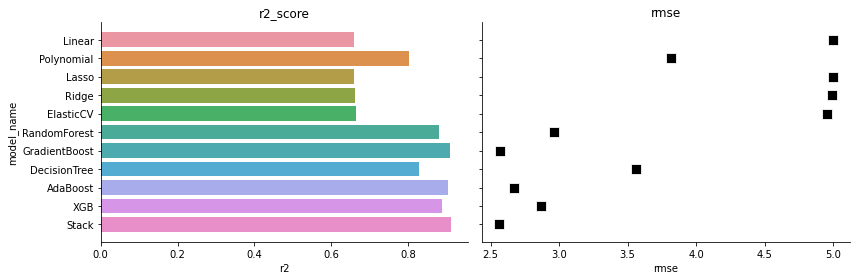

In [180]:
viz(dic)

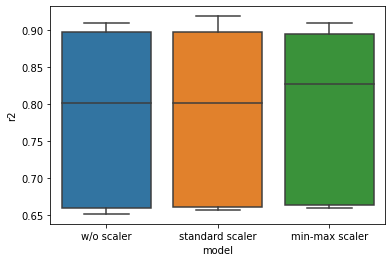

In [182]:
# Create a list of dataframes
data3 = [pd.DataFrame({'r2': r2_scores[0], 'model': 'w/o scaler'}), 
        pd.DataFrame({'r2': r2_scores[1], 'model': 'standard scaler'}), 
        pd.DataFrame({'r2': r2_scores[2], 'model': 'min-max scaler'})]

# Concatenate the dataframes into one
df_r2 = pd.concat(data3)

# Create the boxplot
sns.boxplot(x='model', y='r2', data=df_r2)
plt.show()

# 업데이트예정
- 컬럼별 전처리 적용 후 
- K-fold 적용 후 

In [41]:
from scipy.stats import yeojohnson
tmp = df.copy()

# tmp['CRIM'] = yeojohnson(tmp['CRIM'])[0]
tmp['ZN'] = yeojohnson(tmp['ZN'])[0]
tmp['AGE'] = yeojohnson(tmp['AGE'])[0]
tmp['DIS'] = np.log(tmp['DIS']+1)
tmp['NOX'] = yeojohnson(tmp['NOX'])[0]
tmp['INDUS'] = yeojohnson(tmp['INDUS'])[0]
# tmp['RAD'] = np.log(tmp['RAD']+1)
tmp['TAX'] = np.log(np.log(tmp['TAX']+1))
# tmp['B'] =  yeojohnson(tmp['B'])[0]
tmp['PTRATIO'] = yeojohnson(tmp['PTRATIO'])[0]
tmp['LSTAT'] = np.log(tmp['LSTAT']+1)

로그 변환이 오른쪽으로 치우친 데이터에 대한 정규 분포로 이어지지 않으면 제곱근 또는 역 변환과 같은 다른 변환을 시도할 수 있습니다. 데이터에 대한 정규 분포를 가정하지 않는 비모수적 모델 사용을 고려할 수도 있습니다. 또한 데이터를 분석하고 왜도의 근본 원인을 이해하고 가능한 경우 이를 해결하는 것이 유용할 수 있습니다.

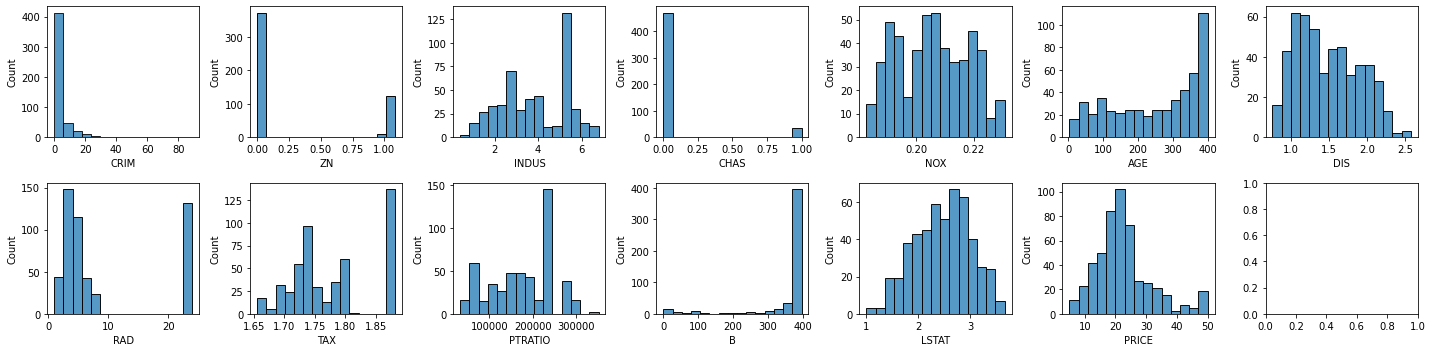

In [42]:
fig, ax = plt.subplots(2,7, figsize=(20, 5))
i = 0

# flatten 써줘서 입체적으로 ax 좌표 입력 안해줘도 된다.
ax = ax.flatten()

for k,v in df.items():
    sns.histplot(x=k, data=tmp, ax=ax[i], bins=15)
    i += 1

    plt.tight_layout()
plt.show()

In [43]:
pd.DataFrame(tmp.corr().abs()['PRICE'].sort_values(ascending=False).round(4)*100).T

,PRICE,LSTAT,PTRATIO,INDUS,TAX,NOX,CRIM,AGE,RAD,ZN,B,DIS,CHAS
PRICE,100.0,81.08,51.12,50.95,47.47,42.97,38.83,38.43,38.16,37.58,33.35,28.57,17.53


In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

target = 'PRICE'
y = df[target]
X = df.drop([target], axis=1).values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = stack
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     model = stack
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE:", rmse)

RMSE: 3.7159763666557204
RMSE: 3.862827061739923
RMSE: 4.116765232973635
RMSE: 3.8134999410696797
RMSE: 4.270053816224281


In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

target = 'PRICE'
y = df[target]
X = df.drop([target], axis=1).values

kf = KFold(n_splits=10, shuffle=True, random_state=42)

model = gb
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     model = stack
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(rmse)
    print("RMSE:", rmse)

RMSE: 3.113625938722124
RMSE: 3.768478883106768
RMSE: 4.5351049541765045
RMSE: 3.4846345957897924
RMSE: 4.469275877728849
RMSE: 3.652655089071732
RMSE: 3.802222078146448
RMSE: 3.922710412984719
RMSE: 3.851540285076984
RMSE: 4.107880286361172


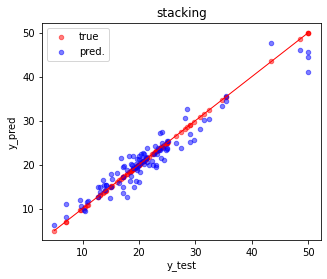

In [166]:
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

plt.figure(figsize=(5,4))
sns.regplot(x=y_test, y=y_test, scatter_kws={'s':20, 'color':'r', 'alpha':0.5}, line_kws={'color':'r',  'lw':1}, label='true')
sns.regplot(x=y_test, y =y_pred, scatter_kws={'color':'b', 's':20, 'alpha':0.5}, line_kws={'color':'b', 'alpha':0.0}, ci=None,label='pred.')
plt.title('stacking')
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.legend()
plt.show()